In [3]:
#%matplotlib qt

In [4]:
import mne
import pandas as pd

In [5]:
subject_id = 'sub-101'

In [6]:
file_path = f'./{subject_id}_task-sleep_eeg.set'

In [7]:
raw_data = mne.io.read_raw_eeglab(file_path, preload=True)

Reading /Users/trevorgollaher/Documents/Methods_class/sub-101_task-sleep_eeg.fdt
Reading 0 ... 14982264  =      0.000 ... 29964.528 secs...


In [8]:
channels_df = pd.read_csv(f'./{subject_id}_task-sleep_channels.tsv', sep='\t')

In [9]:
participants_df = pd.read_csv('./participants.tsv', sep='\t')

In [10]:
print("MNE Raw Data Summary:")
print(raw_data)
print("\nChannels DataFrame:")
print(channels_df.head())
print("\nParticipants DataFrame:")
print(participants_df.head())

MNE Raw Data Summary:
<RawEEGLAB | sub-101_task-sleep_eeg.fdt, 3 x 14982265 (29964.5 s), ~342.9 MiB, data loaded>

Channels DataFrame:
      name  type  units
0  FP1-AFz   NaN    NaN
1  FP2-AFz   NaN    NaN
2       FF   NaN    NaN

Participants DataFrame:
  participant_id  age     sex       ethnicity
0        sub-101   29  Female           Asian
1        sub-102   24  Female           White
2        sub-104   21    Male           Asian
3        sub-105   25    Male  Hispanic White
4        sub-106   20    Male           Mixed


In [11]:
print(raw_data.info)

<Info | 8 non-empty values
 bads: []
 ch_names: FP1-AFz, FP2-AFz, FF
 chs: 3 EEG
 custom_ref_applied: False
 dig: 3 items (3 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 3
 projs: []
 sfreq: 500.0 Hz
>


In [12]:
#raw_data.plot(start=0, duration=30, n_channels=3, scalings=dict(eeg=20e-6), show_options=True)

In [13]:
raw_data.filter(l_freq=0.3, h_freq=None, n_jobs=1)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.3 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.30
- Lower transition bandwidth: 0.30 Hz (-6 dB cutoff frequency: 0.15 Hz)
- Filter length: 5501 samples (11.002 s)



<RawEEGLAB | sub-101_task-sleep_eeg.fdt, 3 x 14982265 (29964.5 s), ~342.9 MiB, data loaded>

In [14]:
raw_data.filter(l_freq=None, h_freq=30, n_jobs=1)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 221 samples (0.442 s)



<RawEEGLAB | sub-101_task-sleep_eeg.fdt, 3 x 14982265 (29964.5 s), ~342.9 MiB, data loaded>

In [15]:
raw_data.notch_filter(50, n_jobs=1)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3301 samples (6.602 s)



<RawEEGLAB | sub-101_task-sleep_eeg.fdt, 3 x 14982265 (29964.5 s), ~342.9 MiB, data loaded>

In [16]:
print(raw_data.annotations)

<Annotations | 0 segments>


In [17]:
import scipy.io as sio
eeglab_data = sio.loadmat(file_path)

In [18]:
print(eeglab_data.keys())

dict_keys(['__header__', '__version__', '__globals__', 'setname', 'filename', 'filepath', 'subject', 'group', 'condition', 'session', 'comments', 'nbchan', 'trials', 'pnts', 'srate', 'xmin', 'xmax', 'times', 'data', 'icaact', 'icawinv', 'icasphere', 'icaweights', 'icachansind', 'chanlocs', 'urchanlocs', 'chaninfo', 'ref', 'event', 'urevent', 'eventdescription', 'epoch', 'epochdescription', 'reject', 'stats', 'specdata', 'specicaact', 'splinefile', 'icasplinefile', 'dipfit', 'history', 'saved', 'etc', 'acceleration', 'totalacc', 'run', 'VisualHypnogram', 'datfile', 'roi', 'SpectralScore'])


In [19]:
hypnogram_data = eeglab_data['VisualHypnogram']

In [20]:
print(hypnogram_data)

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 5 5
  5 5 5 5 5 5 5 5 5 5 5 1 3 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
  5 5 5 5 5 4 4 1 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 4 4 4
  2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 3 3 4 4
  4 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5
  5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1
  1 3 5 5 5 5 4 4 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 1 1 2
  4 4 4 1 1 2 2 2 2 2 3 3 3 2 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
  4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

In [21]:
import numpy as np

print(hypnogram_data.shape)

(1, 999)


In [22]:
hypnogram_data = np.squeeze(hypnogram_data)

In [23]:
print(hypnogram_data)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 4 4 5 5 5 5 5
 5 5 5 5 5 5 5 5 1 3 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 4 4 1 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 4 4 4 2 2 2 2 2 2
 4 4 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 3 3 4 4 4 4 4 3 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 1 1 3 5 5 5 5 4 4 2 2
 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 1 1 2 4 4 4 1 1 2 2 2 2 2 3 3
 3 2 4 4 2 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 5 5 5 5 5 5 5 

In [35]:
import numpy as np

#Step 1: Create a mapping from numbers to names so that MNE recognizes the strings

mapping = {1: 'Wake', 2: 'REM', 3: 'N1', 4: 'N2', 5: 'N3', 0: 'Unknown'}
annotation_strings = [mapping[int(x)] for x in hypnogram_data]



#Step 2: Create MNE Annotations

sfreq = raw_data.info['sfreq']
onset = np.arange(len(annotation_strings)) * 30.
duration = np.full(len(annotation_strings), 30)
annotations = mne.Annotations(onset=onset, duration=duration, description=annotation_strings)


#Step 3: Apply the annotations to your raw data
raw_data.set_annotations(annotations)
 
#Step 4: Confirm they were applied
 
print(raw_data.annotations)



<Annotations | 999 segments: N1 (31), N2 (380), N3 (272), REM (190), Wake ...>


/var/folders/gh/fmfx1hgd6d34ky8s9dslk8840000gn/T/ipykernel_93348/2231254554.py:19: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  raw_data.set_annotations(annotations)


In [25]:
# Create the corrected event_id dictionary without 'Unknown'
event_id = {'Wake': 1, 'REM': 2, 'N1': 3, 'N2': 4, 'N3': 5}

# Create the events array from your annotations.
events, _ = mne.events_from_annotations(raw_data)

# This command will now successfully slice the data into epochs.
epochs = mne.Epochs(
    raw_data,
    events=events,
    tmin=0,
    tmax=30,
    event_id=event_id,
    preload=True,
    baseline=(None, None)
)

print(epochs)

Used Annotations descriptions: [np.str_('N1'), np.str_('N2'), np.str_('N3'), np.str_('REM'), np.str_('Wake')]
Not setting metadata
999 matching events found
Setting baseline interval to [0.0, 30.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 999 events and 15001 original time points ...
1 bad epochs dropped
<Epochs | 998 events (all good), 0 – 30 s (baseline 0 – 30 s), ~342.7 MiB, data loaded,
 'Wake': 31
 'REM': 380
 'N1': 272
 'N2': 190
 'N3': 125>


Using matplotlib as 2D backend.


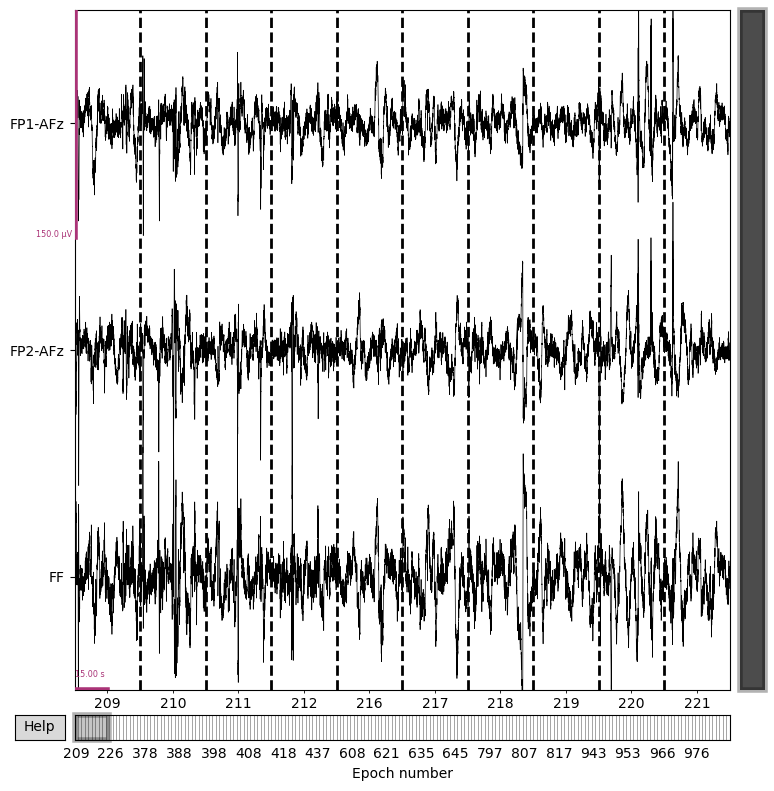

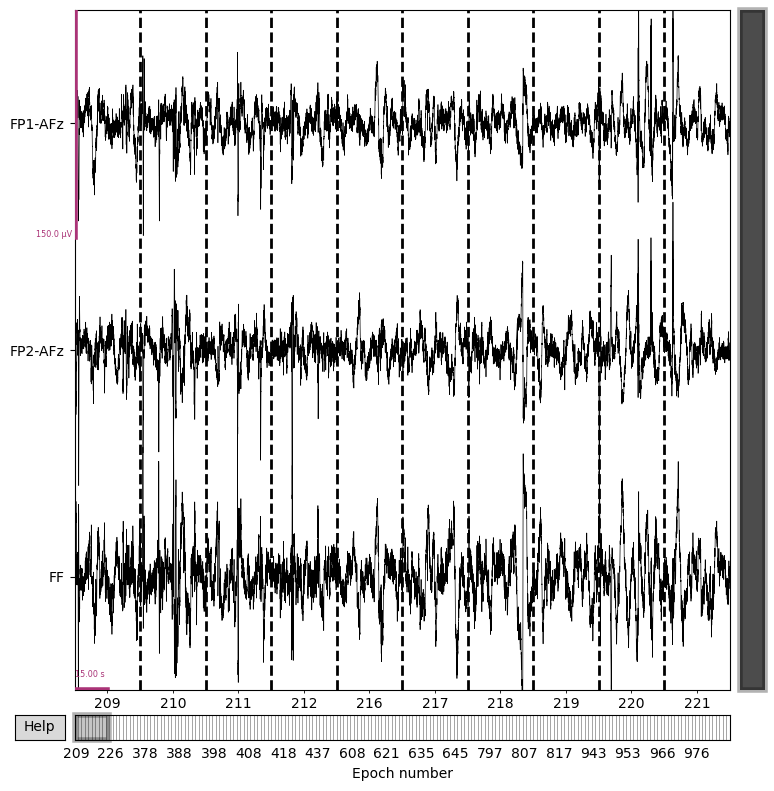

In [36]:
# 1. Select only the epochs labeled 'N2'
n2_epochs = epochs['N2']

# 2. Plot the average waveform of all N2 epochs
n2_epochs.plot(n_epochs=10, n_channels=10, title='Sample N2 Epochs', scalings={'eeg': 75e-6})

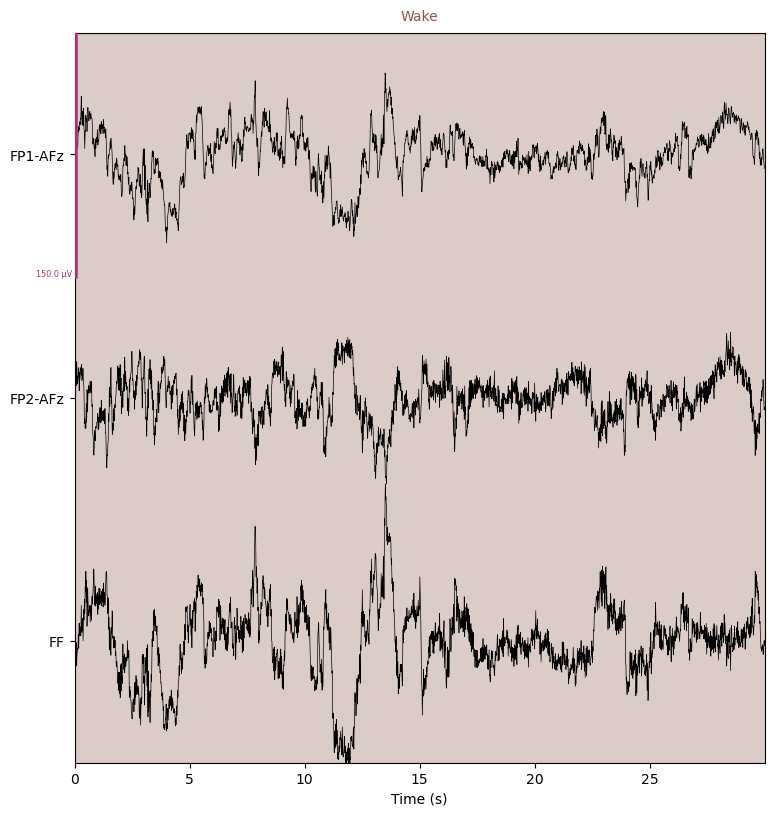

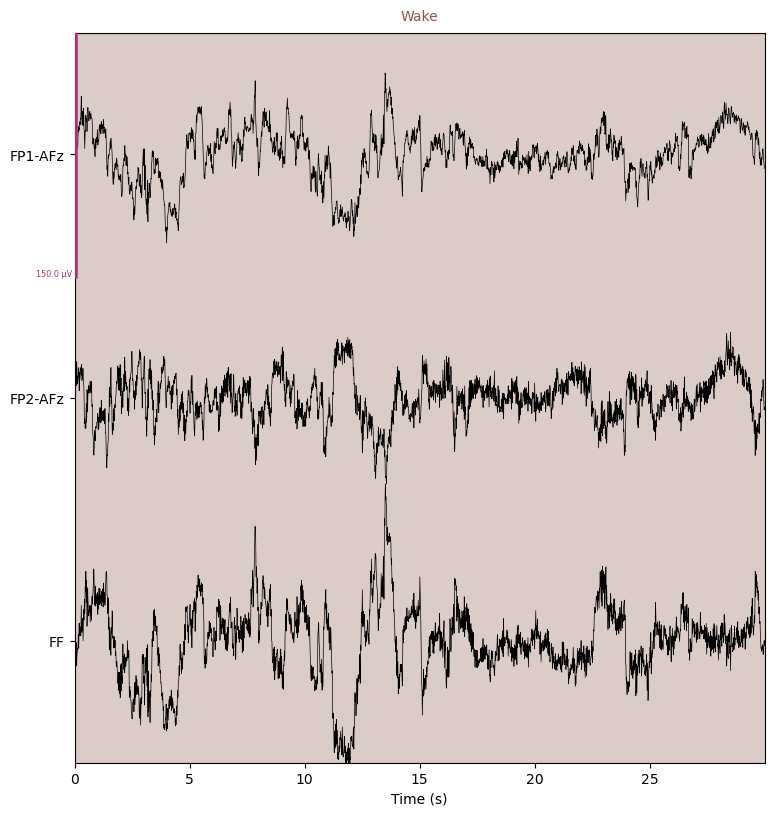

In [44]:
# Plot the entire raw data recording.
# The annotations we created will appear as colored bars at the top, forming the hypnogram.
raw_data.plot(
    start=0,
    duration=30,
    scalings={'eeg': 75e-6},
    clipping=None,
    show_scrollbars=False
)

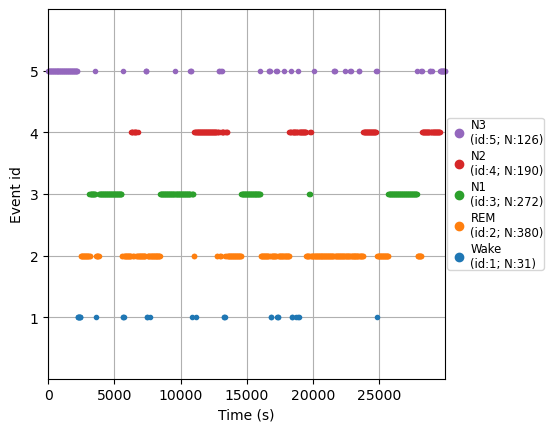

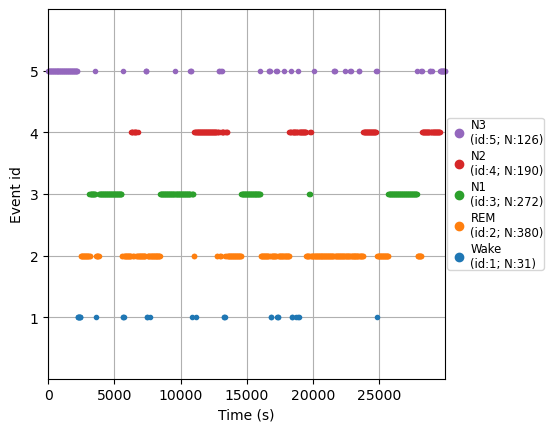

In [49]:
import mne.viz
# Use the 'events' array we already created.
mne.viz.plot_events(
    events=events,
    sfreq=raw_data.info['sfreq'],
    event_id=event_id,
    show=True
)

combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)
combining channels using GFP (eeg channels)


/var/folders/gh/fmfx1hgd6d34ky8s9dslk8840000gn/T/ipykernel_93348/1093392153.py:5: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


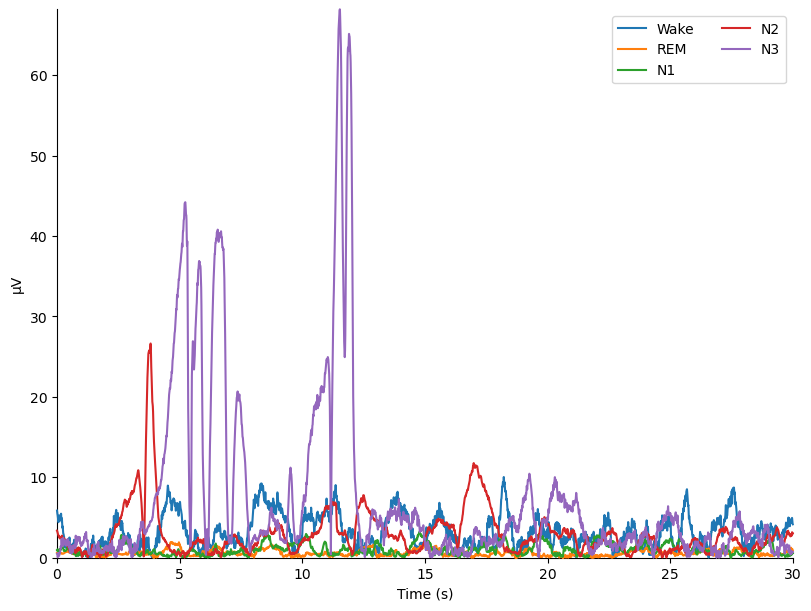

[<Figure size 800x600 with 1 Axes>]

In [54]:
# Create a dictionary of average (Evoked) data, one for each stage
evokeds = {stage: epochs[stage].average() for stage in epochs.event_id.keys()}

# Plot all the average waveforms on the same axes for comparison
mne.viz.plot_compare_evokeds(
    evokeds,
    legend='upper right',
    truncate_yaxis=False, # Show the full voltage range
    show_sensors=True
)